## Population 

Here we grab the populations of each county in our data set, which we will merge later on.

In [24]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Getting the population for each county to merge to the main dataset used for this project

population = pd.read_csv('data/covid_county_population_usafacts.csv', usecols= ['countyFIPS', 'population'])

population = population[population.countyFIPS != 0]

population = population.set_index('countyFIPS')
population


,population
countyFIPS,
1001,55869
1003,223234
1005,24686
1007,22394
1009,57826
...,...
56037,42343
56039,23464
56041,20226


Caclulate the different sum, mean, median, and modes of each column in our confirmed cases file.

In [25]:
confirmed = pd.read_csv('data/covid_confirmed_usafacts.csv')
confirmed = confirmed.drop(confirmed.iloc[:, 4 : 864], axis=1)
confirmed = confirmed.drop(confirmed.iloc[:, 219 : 235], axis=1)

# Calculating the difference to get the new cases
for i in range (5, len(confirmed.columns)):
    diff = confirmed[confirmed.columns[i]] - confirmed[confirmed.columns[i - 1]]
    confirmed[f'new_cases {confirmed.columns[i]}'] = diff

confirmed = confirmed.drop(confirmed.iloc[:, 4:219], axis= 1)
temp = {}
j = ((len(confirmed.columns) - 4) % 7) - 1

length = len(confirmed.columns) - 3
for i in range(4, len(confirmed.columns), 7):
    if (length) < (i + 7) :
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Sum (Confirmed)'] = confirmed[confirmed.columns[i:i + j]].sum(axis=1)
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Mean (Confirmed)'] = confirmed[confirmed.columns[i:i + j]].mean(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Median (Confirmed)'] = confirmed[confirmed.columns[i:i + j]].median(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + j]} Mode (Confirmed)'] = confirmed[confirmed.columns[i:i + j]].mode(axis=1)[0]
    else:
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 7]} Sum (Confirmed)'] = confirmed[confirmed.columns[i:i + 7]].sum(axis=1)
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 7]} Mean (Confirmed)'] = confirmed[confirmed.columns[i:i + 7]].mean(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 7]} Median (Confirmed)'] = confirmed[confirmed.columns[i:i + 7]].median(axis=1).round()
        confirmed[f'{confirmed.columns[i]} - {confirmed.columns[i + 7]} Mode (Confirmed)'] = confirmed[confirmed.columns[i:i + 7]].mode(axis=1)[0]

confirmed.columns = confirmed.columns.str.replace('new_cases ', '')

#clean the data
confirmed.drop(confirmed[confirmed["countyFIPS"] == 0].index, inplace=True)

display(confirmed.head(5))

,countyFIPS,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,...,2022-12-14 - 2022-12-21 Median (Confirmed),2022-12-14 - 2022-12-21 Mode (Confirmed),2022-12-21 - 2022-12-28 Sum (Confirmed),2022-12-21 - 2022-12-28 Mean (Confirmed),2022-12-21 - 2022-12-28 Median (Confirmed),2022-12-21 - 2022-12-28 Mode (Confirmed),2022-12-28 - 2022-12-31 Sum (Confirmed),2022-12-28 - 2022-12-31 Mean (Confirmed),2022-12-28 - 2022-12-31 Median (Confirmed),2022-12-28 - 2022-12-31 Mode (Confirmed)
1,1001,Autauga County,AL,1,6,9,0,0,0,54,...,0.0,0.0,114,16.0,0.0,0.0,0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,68,68,0,0,0,247,...,0.0,0.0,275,39.0,0.0,0.0,0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,3,4,0,0,0,5,...,0.0,0.0,20,3.0,0.0,0.0,0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,8,4,0,0,0,22,...,0.0,0.0,24,3.0,0.0,0.0,0,0.0,0.0,0.0
5,1009,Blount County,AL,1,4,7,0,0,0,12,...,0.0,0.0,83,12.0,0.0,0.0,0,0.0,0.0,0.0


In [46]:
deaths = pd.read_csv("data/covid_deaths_usafacts.csv")

deaths = deaths.drop(deaths.iloc[:, 4 : 864], axis=1)
deaths = deaths.drop(deaths.iloc[:, 219 : 235], axis=1)

# Calculating the difference to get the new death cases
for i in range (5, len(deaths.columns)):
    diff = deaths[deaths.columns[i]] - deaths[deaths.columns[i - 1]]
    deaths[f'new_deaths {deaths.columns[i]}'] = diff

deaths = deaths.drop(deaths.iloc[:, 4:219], axis= 1)
temp = {}
j = ((len(deaths.columns) - 4) % 7) - 1

length = len(deaths.columns) - 3
for i in range(4, len(deaths.columns), 7):
    if (length) < (i + 7) :
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Sum (Deaths)'] = deaths[deaths.columns[i:i + j]].sum(axis=1)
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Mean (Deaths)'] = deaths[deaths.columns[i:i + j]].mean(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Median (Deaths)'] = deaths[deaths.columns[i:i + j]].median(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + j]} Mode (Deaths)'] = deaths[deaths.columns[i:i + j]].mode(axis=1)[0]
    else:
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 7]} Sum (Deaths)'] = deaths[deaths.columns[i:i + 7]].sum(axis=1)
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 7]} Mean (Deaths)'] = deaths[deaths.columns[i:i + 7]].mean(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 7]} Median (Deaths)'] = deaths[deaths.columns[i:i + 7]].median(axis=1).round()
        deaths[f'{deaths.columns[i]} - {deaths.columns[i + 7]} Mode (Deaths)'] = deaths[deaths.columns[i:i + 7]].mode(axis=1)[0]


deaths.columns = deaths.columns.str.replace('new_deaths ', '')

deaths.drop(deaths[deaths["County Name"].str.contains("Statewide")==True].index, inplace=True)

deaths.head(5)



,countyFIPS,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,...,2022-12-14 - 2022-12-21 Median (Deaths),2022-12-14 - 2022-12-21 Mode (Deaths),2022-12-21 - 2022-12-28 Sum (Deaths),2022-12-21 - 2022-12-28 Mean (Deaths),2022-12-21 - 2022-12-28 Median (Deaths),2022-12-21 - 2022-12-28 Mode (Deaths),2022-12-28 - 2022-12-31 Sum (Deaths),2022-12-28 - 2022-12-31 Mean (Deaths),2022-12-28 - 2022-12-31 Median (Deaths),2022-12-28 - 2022-12-31 Mode (Deaths)
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0.0,0,2,0.0,0.0,0,0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,0.0,0,1,0.0,0.0,0,0,0.0,0.0,0.0
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0


Merge our population DF into our confirmed DF and display the data to find trends.

In [27]:
# Merging population to both confirmed and death dataframe
confirmed = confirmed.merge(population, how='left', on='countyFIPS')

confirmed = confirmed.fillna(0)
confirmed

,countyFIPS,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,...,2022-12-14 - 2022-12-21 Mode (Confirmed),2022-12-21 - 2022-12-28 Sum (Confirmed),2022-12-21 - 2022-12-28 Mean (Confirmed),2022-12-21 - 2022-12-28 Median (Confirmed),2022-12-21 - 2022-12-28 Mode (Confirmed),2022-12-28 - 2022-12-31 Sum (Confirmed),2022-12-28 - 2022-12-31 Mean (Confirmed),2022-12-28 - 2022-12-31 Median (Confirmed),2022-12-28 - 2022-12-31 Mode (Confirmed),population
0,1001,Autauga County,AL,1,6,9,0,0,0,54,...,0.0,114,16.0,0.0,0.0,0,0.0,0.0,0.0,55869
1,1003,Baldwin County,AL,1,68,68,0,0,0,247,...,0.0,275,39.0,0.0,0.0,0,0.0,0.0,0.0,223234
2,1005,Barbour County,AL,1,3,4,0,0,0,5,...,0.0,20,3.0,0.0,0.0,0,0.0,0.0,0.0,24686
3,1007,Bibb County,AL,1,8,4,0,0,0,22,...,0.0,24,3.0,0.0,0.0,0,0.0,0.0,0.0,22394
4,1009,Blount County,AL,1,4,7,0,0,0,12,...,0.0,83,12.0,0.0,0.0,0,0.0,0.0,0.0,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,0.0,20,3.0,0.0,0.0,0,0.0,0.0,0.0,42343
3138,56039,Teton County,WY,56,0,0,0,0,0,0,...,0.0,29,4.0,0.0,0.0,0,0.0,0.0,0.0,23464
3139,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0.0,16,2.0,0.0,0.0,0,0.0,0.0,0.0,20226
3140,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,7805


In [49]:
# Merging population to both confirmed and death dataframe
deaths = deaths.merge(population, how='left', on='countyFIPS')

deaths = deaths.fillna(0)



deaths

,countyFIPS,County Name,State,StateFIPS,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,...,2022-12-21 - 2022-12-28 Sum (Deaths),2022-12-21 - 2022-12-28 Mean (Deaths),2022-12-21 - 2022-12-28 Median (Deaths),2022-12-21 - 2022-12-28 Mode (Deaths),2022-12-28 - 2022-12-31 Sum (Deaths),2022-12-28 - 2022-12-31 Mean (Deaths),2022-12-28 - 2022-12-31 Median (Deaths),2022-12-28 - 2022-12-31 Mode (Deaths),population_x,population_y
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,55869,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,2,0.0,0.0,0,0,0.0,0.0,0.0,223234,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,24686,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,22394,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,57826,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,1,0.0,0.0,0,0,0.0,0.0,0.0,42343,42343
3138,56039,Teton County,WY,56,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,23464,23464
3139,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,20226,20226
3140,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,7805,7805


### Merge

Merge our new found deaths, cases and the final population into a new .csv for use in our member works portion




In [29]:
comp_data = pd.merge(confirmed, deaths,  how='left', on=['countyFIPS', 'County Name', 'State', 'StateFIPS'])
comp_data = comp_data.merge(population, how='left', on=['countyFIPS'])
comp_data.columns = comp_data.columns.str.replace('_x', '_confirmed')
comp_data.columns = comp_data.columns.str.replace('_y', '_deaths')
comp_data = comp_data.dropna()
comp_data = comp_data.drop(columns=["population_deaths"], axis=1)

indexes = comp_data[comp_data['countyFIPS'] == 0].index 
comp_data.drop(indexes, inplace=True)

display(comp_data.head(5))
comp_data.to_csv('data/covid_comprehensive.csv', index=False)

,countyFIPS,County Name,State,StateFIPS,2022-06-01_confirmed,2022-06-02_confirmed,2022-06-03_confirmed,2022-06-04_confirmed,2022-06-05_confirmed,2022-06-06_confirmed,...,2022-12-14 - 2022-12-21 Mode (Deaths),2022-12-21 - 2022-12-28 Sum (Deaths),2022-12-21 - 2022-12-28 Mean (Deaths),2022-12-21 - 2022-12-28 Median (Deaths),2022-12-21 - 2022-12-28 Mode (Deaths),2022-12-28 - 2022-12-31 Sum (Deaths),2022-12-28 - 2022-12-31 Mean (Deaths),2022-12-28 - 2022-12-31 Median (Deaths),2022-12-28 - 2022-12-31 Mode (Deaths),population
0,1001,Autauga County,AL,1,6,9,0,0,0,54,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,55869
1,1003,Baldwin County,AL,1,68,68,0,0,0,247,...,0,2,0.0,0.0,0,0,0.0,0.0,0.0,223234
2,1005,Barbour County,AL,1,3,4,0,0,0,5,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,24686
3,1007,Bibb County,AL,1,8,4,0,0,0,22,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,22394
4,1009,Blount County,AL,1,4,7,0,0,0,12,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,57826


In [30]:
# Filter only columns that contain the mean value of the weeks
filter_conf_mean = confirmed.filter(regex=r'countyFIPS|County Name|State|StateFIPS|Mean')

# Calculate basic statistics (mean, median, mode) on that mean data
mean_tot = filter_conf_mean.iloc[:,4:].mean(axis=1).round()
filter_conf_mean['Total Mean Mean'] = mean_tot

median_tot = filter_conf_mean.iloc[:,4:].median(axis=1).round()
filter_conf_mean['Total Mean Median'] = median_tot

mode_tot = filter_conf_mean.iloc[:,4:].mode(axis=1)[0]
filter_conf_mean['Total Mean Mode'] = mode_tot

filter_conf_mean

C:\Users\warso\AppData\Local\Temp\ipykernel_9672\3341144699.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_conf_mean['Total Mean Mean'] = mean_tot
C:\Users\warso\AppData\Local\Temp\ipykernel_9672\3341144699.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_conf_mean['Total Mean Median'] = median_tot
C:\Users\warso\AppData\Local\Temp\ipykernel_9672\3341144699.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,countyFIPS,County Name,State,StateFIPS,2022-06-01 - 2022-06-08 Mean (Confirmed),2022-06-08 - 2022-06-15 Mean (Confirmed),2022-06-15 - 2022-06-22 Mean (Confirmed),2022-06-22 - 2022-06-29 Mean (Confirmed),2022-06-29 - 2022-07-06 Mean (Confirmed),2022-07-06 - 2022-07-13 Mean (Confirmed),...,2022-11-16 - 2022-11-23 Mean (Confirmed),2022-11-23 - 2022-11-30 Mean (Confirmed),2022-11-30 - 2022-12-07 Mean (Confirmed),2022-12-07 - 2022-12-14 Mean (Confirmed),2022-12-14 - 2022-12-21 Mean (Confirmed),2022-12-21 - 2022-12-28 Mean (Confirmed),2022-12-28 - 2022-12-31 Mean (Confirmed),Total Mean Mean,Total Mean Median,Total Mean Mode
0,1001,Autauga County,AL,1,13.0,15.0,22.0,26.0,18.0,43.0,...,3.0,3.0,10.0,10.0,14.0,16.0,0.0,14.0,14.0,4.0
1,1003,Baldwin County,AL,1,63.0,71.0,79.0,98.0,74.0,133.0,...,8.0,30.0,36.0,32.0,39.0,39.0,0.0,51.0,44.0,11.0
2,1005,Barbour County,AL,1,4.0,4.0,7.0,7.0,8.0,18.0,...,1.0,1.0,2.0,1.0,3.0,3.0,0.0,6.0,4.0,1.0
3,1007,Bibb County,AL,1,5.0,5.0,8.0,8.0,6.0,9.0,...,1.0,2.0,1.0,2.0,2.0,3.0,0.0,5.0,4.0,2.0
4,1009,Blount County,AL,1,6.0,9.0,10.0,13.0,13.0,26.0,...,4.0,7.0,6.0,8.0,13.0,12.0,0.0,12.0,12.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,WY,56,0.0,38.0,7.0,10.0,10.0,10.0,...,5.0,6.0,0.0,6.0,4.0,3.0,0.0,6.0,5.0,6.0
3138,56039,Teton County,WY,56,0.0,46.0,21.0,15.0,15.0,17.0,...,3.0,3.0,0.0,5.0,3.0,4.0,0.0,8.0,5.0,3.0
3139,56041,Uinta County,WY,56,0.0,10.0,4.0,4.0,6.0,7.0,...,3.0,2.0,0.0,2.0,2.0,2.0,0.0,3.0,2.0,2.0
3140,56043,Washakie County,WY,56,0.0,15.0,3.0,-1.0,2.0,3.0,...,2.0,1.0,0.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0


In [47]:
filter_deaths_mean = deaths.filter(regex=r'countyFIPS|County Name|State|StateFIPS|Mean')

# Calculate basic statistics (mean, median, mode) on that mean data
mean_tot_death = filter_deaths_mean.iloc[:,4:].mean(axis=1).round()
filter_deaths_mean['Total Mean Mean'] = mean_tot_death

median_tot_death = filter_deaths_mean.iloc[:,4:].median(axis=1).round()
filter_deaths_mean['Total Mean Median'] = median_tot_death

mode_tot_death = filter_deaths_mean.iloc[:,4:].mode(axis=1)[0]
filter_deaths_mean['Total Mean Mode'] = mode_tot_death

filter_deaths_mean.drop(filter_deaths_mean[filter_deaths_mean["County Name"].str.contains("Statewide") == True].index, inplace=True)

filter_deaths_mean

C:\Users\warso\AppData\Local\Temp\ipykernel_9672\3604988618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_deaths_mean['Total Mean Mean'] = mean_tot_death
C:\Users\warso\AppData\Local\Temp\ipykernel_9672\3604988618.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_deaths_mean['Total Mean Median'] = median_tot_death
C:\Users\warso\AppData\Local\Temp\ipykernel_9672\3604988618.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,countyFIPS,County Name,State,StateFIPS,2022-06-01 - 2022-06-08 Mean (Deaths),2022-06-08 - 2022-06-15 Mean (Deaths),2022-06-15 - 2022-06-22 Mean (Deaths),2022-06-22 - 2022-06-29 Mean (Deaths),2022-06-29 - 2022-07-06 Mean (Deaths),2022-07-06 - 2022-07-13 Mean (Deaths),...,2022-11-16 - 2022-11-23 Mean (Deaths),2022-11-23 - 2022-11-30 Mean (Deaths),2022-11-30 - 2022-12-07 Mean (Deaths),2022-12-07 - 2022-12-14 Mean (Deaths),2022-12-14 - 2022-12-21 Mean (Deaths),2022-12-21 - 2022-12-28 Mean (Deaths),2022-12-28 - 2022-12-31 Mean (Deaths),Total Mean Mean,Total Mean Median,Total Mean Mode
1,1001,Autauga County,AL,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1009,Blount County,AL,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3189,56039,Teton County,WY,56,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3190,56041,Uinta County,WY,56,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3191,56043,Washakie County,WY,56,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
world_df = pd.read_csv("data/owid-covid-data-cases.csv", usecols=['location','date','total_cases','new_cases','total_deaths','new_deaths','population'])

# Selecting only the countries that have similar population as the US

pop_similar_usa = ['Indonesia','Pakistan','Nigeria']
dates_used = (world_df['date'] >= '2022-06-01') & (world_df['date'] < '2023-01-01')

world_df = world_df[world_df['location'].isin(pop_similar_usa)]
world_df = world_df.loc[dates_used]
world_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
107913,Indonesia,2022-06-01,6055341.0,368.0,156594.0,3.0,275501344.0
107914,Indonesia,2022-06-02,6055645.0,304.0,156600.0,6.0,275501344.0
107915,Indonesia,2022-06-03,6056017.0,372.0,156604.0,4.0,275501344.0
107916,Indonesia,2022-06-04,6056412.0,395.0,156610.0,6.0,275501344.0
107917,Indonesia,2022-06-05,6056800.0,388.0,156615.0,5.0,275501344.0
...,...,...,...,...,...,...,...
179292,Pakistan,2022-12-27,1575651.0,0.0,30635.0,0.0,235824864.0
179293,Pakistan,2022-12-28,1575651.0,0.0,30635.0,0.0,235824864.0
179294,Pakistan,2022-12-29,1575772.0,121.0,30636.0,1.0,235824864.0
179295,Pakistan,2022-12-30,1575772.0,0.0,30636.0,0.0,235824864.0


In [33]:
pakistan_df = world_df[world_df['location'].str.contains('Pakistan')].reset_index().drop(['index'], axis = 1)

pakistan_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Pakistan,2022-06-01,1530520.0,67.0,30379.0,0.0,235824864.0
1,Pakistan,2022-06-02,1530556.0,36.0,30379.0,0.0,235824864.0
2,Pakistan,2022-06-03,1530556.0,0.0,30379.0,0.0,235824864.0
3,Pakistan,2022-06-04,1530556.0,0.0,30379.0,0.0,235824864.0
4,Pakistan,2022-06-05,1530764.0,208.0,30379.0,0.0,235824864.0
...,...,...,...,...,...,...,...
209,Pakistan,2022-12-27,1575651.0,0.0,30635.0,0.0,235824864.0
210,Pakistan,2022-12-28,1575651.0,0.0,30635.0,0.0,235824864.0
211,Pakistan,2022-12-29,1575772.0,121.0,30636.0,1.0,235824864.0
212,Pakistan,2022-12-30,1575772.0,0.0,30636.0,0.0,235824864.0


In [34]:
# Pakistan new cases weekly mean - median - mode
temp = {}
for i in range(0, len(pakistan_df.date), 7):
    if (i + 7) > len(pakistan_df.date):
        j = len(pakistan_df.date) - i -1
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + j]} Sum'] = (pakistan_df.new_cases[i:i + j]).sum()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + j]} Mean'] = (pakistan_df.new_cases[i:i + j]).mean().round()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + j]} Median'] = (pakistan_df.new_cases[i:i + j]).median().round()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + j]} Mode'] = (pakistan_df.new_cases[i:i + j]).mode()[0]
    else:
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + 7]} Sum'] = (pakistan_df.new_cases[i:i + 7]).sum()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i+7]} Mean'] = (pakistan_df.new_cases[i:i+7]).mean().round()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + 7]} Median'] = (pakistan_df.new_cases[i:i + 7]).median().round()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + 7]} Mode'] = (pakistan_df.new_cases[i:i + 7]).mode()[0]


pakistan_df_confirmed = pd.DataFrame(temp, index = ['Pakistan'])
pakistan_df_confirmed['population'] = pakistan_df.population[0]

pakistan_df_confirmed


,2022-06-01 - 2022-06-08 Sum,2022-06-01 - 2022-06-08 Mean,2022-06-01 - 2022-06-08 Median,2022-06-01 - 2022-06-08 Mode,2022-06-08 - 2022-06-15 Sum,2022-06-08 - 2022-06-15 Mean,2022-06-08 - 2022-06-15 Median,2022-06-08 - 2022-06-15 Mode,2022-06-15 - 2022-06-22 Sum,2022-06-15 - 2022-06-22 Mean,...,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
Pakistan,425.0,61.0,50.0,0.0,559.0,80.0,89.0,0.0,1033.0,148.0,...,0.0,165.0,24.0,0.0,0.0,121.0,40.0,0.0,0.0,235824864.0


In [35]:
# Pakistan new deaths weekly mean - median - mode
temp = {}
for i in range(0, len(pakistan_df.date), 7):
    if (i + 7) > len(pakistan_df.date):
        j = len(pakistan_df.date) - i -1
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + j]} Sum'] = (pakistan_df.new_deaths[i:i + j]).sum()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + j]} Mean'] = (pakistan_df.new_deaths[i:i + j]).mean().round()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + j]} Median'] = (pakistan_df.new_deaths[i:i + j]).median().round()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + j]} Mode'] = (pakistan_df.new_deaths[i:i + j]).mode()[0]
    else:
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + 7]} Sum'] = (pakistan_df.new_deaths[i:i + 7]).sum()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i+7]} Mean'] = (pakistan_df.new_deaths[i:i+7]).mean().round()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + 7]} Median'] = (pakistan_df.new_deaths[i:i + 7]).median().round()
        temp[f'{pakistan_df.date[i]} - {pakistan_df.date[i + 7]} Mode'] = (pakistan_df.new_deaths[i:i + 7]).mode()[0]


pakistan_df_deaths = pd.DataFrame(temp, index = ['Pakistan'])
pakistan_df_deaths['population'] = pakistan_df.population[0]
pakistan_df_deaths

,2022-06-01 - 2022-06-08 Sum,2022-06-01 - 2022-06-08 Mean,2022-06-01 - 2022-06-08 Median,2022-06-01 - 2022-06-08 Mode,2022-06-08 - 2022-06-15 Sum,2022-06-08 - 2022-06-15 Mean,2022-06-08 - 2022-06-15 Median,2022-06-08 - 2022-06-15 Mode,2022-06-15 - 2022-06-22 Sum,2022-06-15 - 2022-06-22 Mean,...,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
Pakistan,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,235824864.0


In [36]:
indonesia_df = world_df[world_df['location'].str.contains('Indonesia')].reset_index().drop(['index'], axis = 1)

indonesia_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Indonesia,2022-06-01,6055341.0,368.0,156594.0,3.0,275501344.0
1,Indonesia,2022-06-02,6055645.0,304.0,156600.0,6.0,275501344.0
2,Indonesia,2022-06-03,6056017.0,372.0,156604.0,4.0,275501344.0
3,Indonesia,2022-06-04,6056412.0,395.0,156610.0,6.0,275501344.0
4,Indonesia,2022-06-05,6056800.0,388.0,156615.0,5.0,275501344.0
...,...,...,...,...,...,...,...
209,Indonesia,2022-12-27,6717395.0,803.0,160560.0,9.0,275501344.0
210,Indonesia,2022-12-28,6718090.0,695.0,160574.0,14.0,275501344.0
211,Indonesia,2022-12-29,6718775.0,685.0,160583.0,9.0,275501344.0
212,Indonesia,2022-12-30,6719327.0,552.0,160593.0,10.0,275501344.0


In [37]:
# Indonesia new cases weekly mean - median - mode
temp = {}
for i in range(0, len(indonesia_df.date), 7):
    if (i + 7) > len(indonesia_df.date):
        j = len(indonesia_df.date) - i -1
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + j]} Sum'] = (indonesia_df.new_cases[i:i + j]).sum()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + j]} Mean'] = (indonesia_df.new_cases[i:i + j]).mean().round()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + j]} Median'] = (indonesia_df.new_cases[i:i + j]).median().round()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + j]} Mode'] = (indonesia_df.new_cases[i:i + j]).mode()[0]
    else:
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + 7]} Sum'] = (indonesia_df.new_cases[i:i + 7]).sum()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i+7]} Mean'] = (indonesia_df.new_cases[i:i+7]).mean().round()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + 7]} Median'] = (indonesia_df.new_cases[i:i + 7]).median().round()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + 7]} Mode'] = (indonesia_df.new_cases[i:i + 7]).mode()[0]


indonesia_df_confirmed = pd.DataFrame(temp, index = ['Indonesia'])
indonesia_df_confirmed['population'] = indonesia_df.population[0]
indonesia_df_confirmed

,2022-06-01 - 2022-06-08 Sum,2022-06-01 - 2022-06-08 Mean,2022-06-01 - 2022-06-08 Median,2022-06-01 - 2022-06-08 Mode,2022-06-08 - 2022-06-15 Sum,2022-06-08 - 2022-06-15 Mean,2022-06-08 - 2022-06-15 Median,2022-06-08 - 2022-06-15 Mode,2022-06-15 - 2022-06-22 Sum,2022-06-15 - 2022-06-22 Mean,...,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
Indonesia,2687.0,384.0,372.0,304.0,4349.0,621.0,574.0,520.0,8924.0,1275.0,...,809.0,5692.0,813.0,803.0,468.0,1932.0,644.0,685.0,552.0,275501344.0


In [38]:
# Indonesia new deaths weekly mean - median - mode
temp = {}
for i in range(0, len(indonesia_df.date), 7):
    if (i + 7) > len(indonesia_df.date):
        j = len(indonesia_df.date) - i -1
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + j]} Sum'] = (indonesia_df.new_deaths[i:i + j]).sum()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + j]} Mean'] = (indonesia_df.new_deaths[i:i + j]).mean().round()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + j]} Median'] = (indonesia_df.new_deaths[i:i + j]).median().round()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + j]} Mode'] = (indonesia_df.new_deaths[i:i + j]).mode()[0]
    else:
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + 7]} Sum'] = (indonesia_df.new_deaths[i:i + 7]).sum()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i+7]} Mean'] = (indonesia_df.new_deaths[i:i+7]).mean().round()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + 7]} Median'] = (indonesia_df.new_deaths[i:i + 7]).median().round()
        temp[f'{indonesia_df.date[i]} - {indonesia_df.date[i + 7]} Mode'] = (indonesia_df.new_deaths[i:i + 7]).mode()[0]



indonesia_df_deaths = pd.DataFrame(temp, index = ['Indonesia'])
indonesia_df_deaths['population'] = indonesia_df.population[0]
indonesia_df_deaths

,2022-06-01 - 2022-06-08 Sum,2022-06-01 - 2022-06-08 Mean,2022-06-01 - 2022-06-08 Median,2022-06-01 - 2022-06-08 Mode,2022-06-08 - 2022-06-15 Sum,2022-06-08 - 2022-06-15 Mean,2022-06-08 - 2022-06-15 Median,2022-06-08 - 2022-06-15 Mode,2022-06-15 - 2022-06-22 Sum,2022-06-15 - 2022-06-22 Mean,...,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
Indonesia,33.0,5.0,5.0,6.0,38.0,5.0,4.0,3.0,38.0,5.0,...,24.0,109.0,16.0,15.0,9.0,33.0,11.0,10.0,9.0,275501344.0


In [39]:
nigeria_df = world_df[world_df['location'].str.contains('Nigeria')].reset_index().drop(['index'], axis = 1)

nigeria_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Nigeria,2022-06-01,256028.0,0.0,3143.0,0.0,218541216.0
1,Nigeria,2022-06-02,256113.0,85.0,3143.0,0.0,218541216.0
2,Nigeria,2022-06-03,256113.0,0.0,3143.0,0.0,218541216.0
3,Nigeria,2022-06-04,256148.0,35.0,3143.0,0.0,218541216.0
4,Nigeria,2022-06-05,256148.0,0.0,3143.0,0.0,218541216.0
...,...,...,...,...,...,...,...
209,Nigeria,2022-12-27,266381.0,0.0,3155.0,0.0,218541216.0
210,Nigeria,2022-12-28,266381.0,0.0,3155.0,0.0,218541216.0
211,Nigeria,2022-12-29,266381.0,0.0,3155.0,0.0,218541216.0
212,Nigeria,2022-12-30,266381.0,0.0,3155.0,0.0,218541216.0


In [40]:
# Nigeria new cases weekly mean - median - mode

temp = {}
for i in range(0, len(nigeria_df.date), 7):
    if (i + 7) > len(nigeria_df.date):
        j = len(nigeria_df.date) - i -1
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + j]} Sum'] = (nigeria_df.new_cases[i:i + j]).sum()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + j]} Mean'] = (nigeria_df.new_cases[i:i + j]).mean().round()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + j]} Median'] = (nigeria_df.new_cases[i:i + j]).median().round()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + j]} Mode'] = (nigeria_df.new_cases[i:i + j]).mode()[0]
    else:
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + 7]} Sum'] = (nigeria_df.new_cases[i:i + 7]).sum()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i+7]} Mean'] = (nigeria_df.new_cases[i:i+7]).mean().round()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + 7]} Median'] = (nigeria_df.new_cases[i:i + 7]).median().round()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + 7]} Mode'] = (nigeria_df.new_cases[i:i + 7]).mode()[0]



nigeria_df_confirmed = pd.DataFrame(temp, index = ['Nigeria'])
nigeria_df_confirmed['population'] = nigeria_df.population[0]
nigeria_df_confirmed

,2022-06-01 - 2022-06-08 Sum,2022-06-01 - 2022-06-08 Mean,2022-06-01 - 2022-06-08 Median,2022-06-01 - 2022-06-08 Mode,2022-06-08 - 2022-06-15 Sum,2022-06-08 - 2022-06-15 Mean,2022-06-08 - 2022-06-15 Median,2022-06-08 - 2022-06-15 Mode,2022-06-15 - 2022-06-22 Sum,2022-06-15 - 2022-06-22 Mean,...,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
Nigeria,199.0,28.0,0.0,0.0,177.0,25.0,0.0,0.0,307.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218541216.0


In [41]:
# Nigeria new deaths weekly mean - median - mode

temp = {}
for i in range(0, len(nigeria_df.date), 7):
    if (i + 7) > len(nigeria_df.date):
        j = len(nigeria_df.date) - i -1
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + j]} Sum'] = (nigeria_df.new_cases[i:i + j]).sum()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + j]} Mean'] = (nigeria_df.new_deaths[i:i + j]).mean().round()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + j]} Median'] = (nigeria_df.new_deaths[i:i + j]).median().round()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + j]} Mode'] = (nigeria_df.new_deaths[i:i + j]).mode()[0]
    else:
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + 7]} Sum'] = (nigeria_df.new_cases[i:i + 7]).sum()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i+7]} Mean'] = (nigeria_df.new_deaths[i:i+7]).mean().round()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + 7]} Median'] = (nigeria_df.new_deaths[i:i + 7]).median().round()
        temp[f'{nigeria_df.date[i]} - {nigeria_df.date[i + 7]} Mode'] = (nigeria_df.new_deaths[i:i + 7]).mode()[0]



nigeria_df_deaths = pd.DataFrame(temp, index = ['Nigeria'])
nigeria_df_deaths['population'] = nigeria_df.population[0]
nigeria_df_deaths

,2022-06-01 - 2022-06-08 Sum,2022-06-01 - 2022-06-08 Mean,2022-06-01 - 2022-06-08 Median,2022-06-01 - 2022-06-08 Mode,2022-06-08 - 2022-06-15 Sum,2022-06-08 - 2022-06-15 Mean,2022-06-08 - 2022-06-15 Median,2022-06-08 - 2022-06-15 Mode,2022-06-15 - 2022-06-22 Sum,2022-06-15 - 2022-06-22 Mean,...,2022-12-14 - 2022-12-21 Mode,2022-12-21 - 2022-12-28 Sum,2022-12-21 - 2022-12-28 Mean,2022-12-21 - 2022-12-28 Median,2022-12-21 - 2022-12-28 Mode,2022-12-28 - 2022-12-31 Sum,2022-12-28 - 2022-12-31 Mean,2022-12-28 - 2022-12-31 Median,2022-12-28 - 2022-12-31 Mode,population
Nigeria,199.0,1.0,0.0,0.0,177.0,0.0,0.0,0.0,307.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218541216.0


In [42]:
def log_normalization(data):
    d = data
    d = d.filter(regex=r'Sum|population')
    d = d.sum()

    for x in range(0, len(d) - 1):
        if d[x] < 0:  # Check if log cannot be taken, get absolute value if so
            d[x] = 0

    norm_log_cases = {}
    for x in range(0, len(d) - 1):
        denominator = d['population']
        norm_log_cases[f'{d.index.values[x]} log normalized'] = np.log(((d[x] + 1e-6) / denominator))

    return norm_log_cases

In [43]:
nigeria_norm_cases = log_normalization(nigeria_df_confirmed)
nigeria_norm_death = log_normalization(nigeria_df_confirmed)

indonesia_norm_cases = log_normalization(indonesia_df_confirmed)
indonesia_norm_death = log_normalization(indonesia_df_deaths)

usa_norm_cases = log_normalization(confirmed)
usa_norm_death = log_normalization(deaths)

pakistan_norm_cases = log_normalization(pakistan_df_confirmed)
pakistan_norm_death = log_normalization(pakistan_df_deaths)

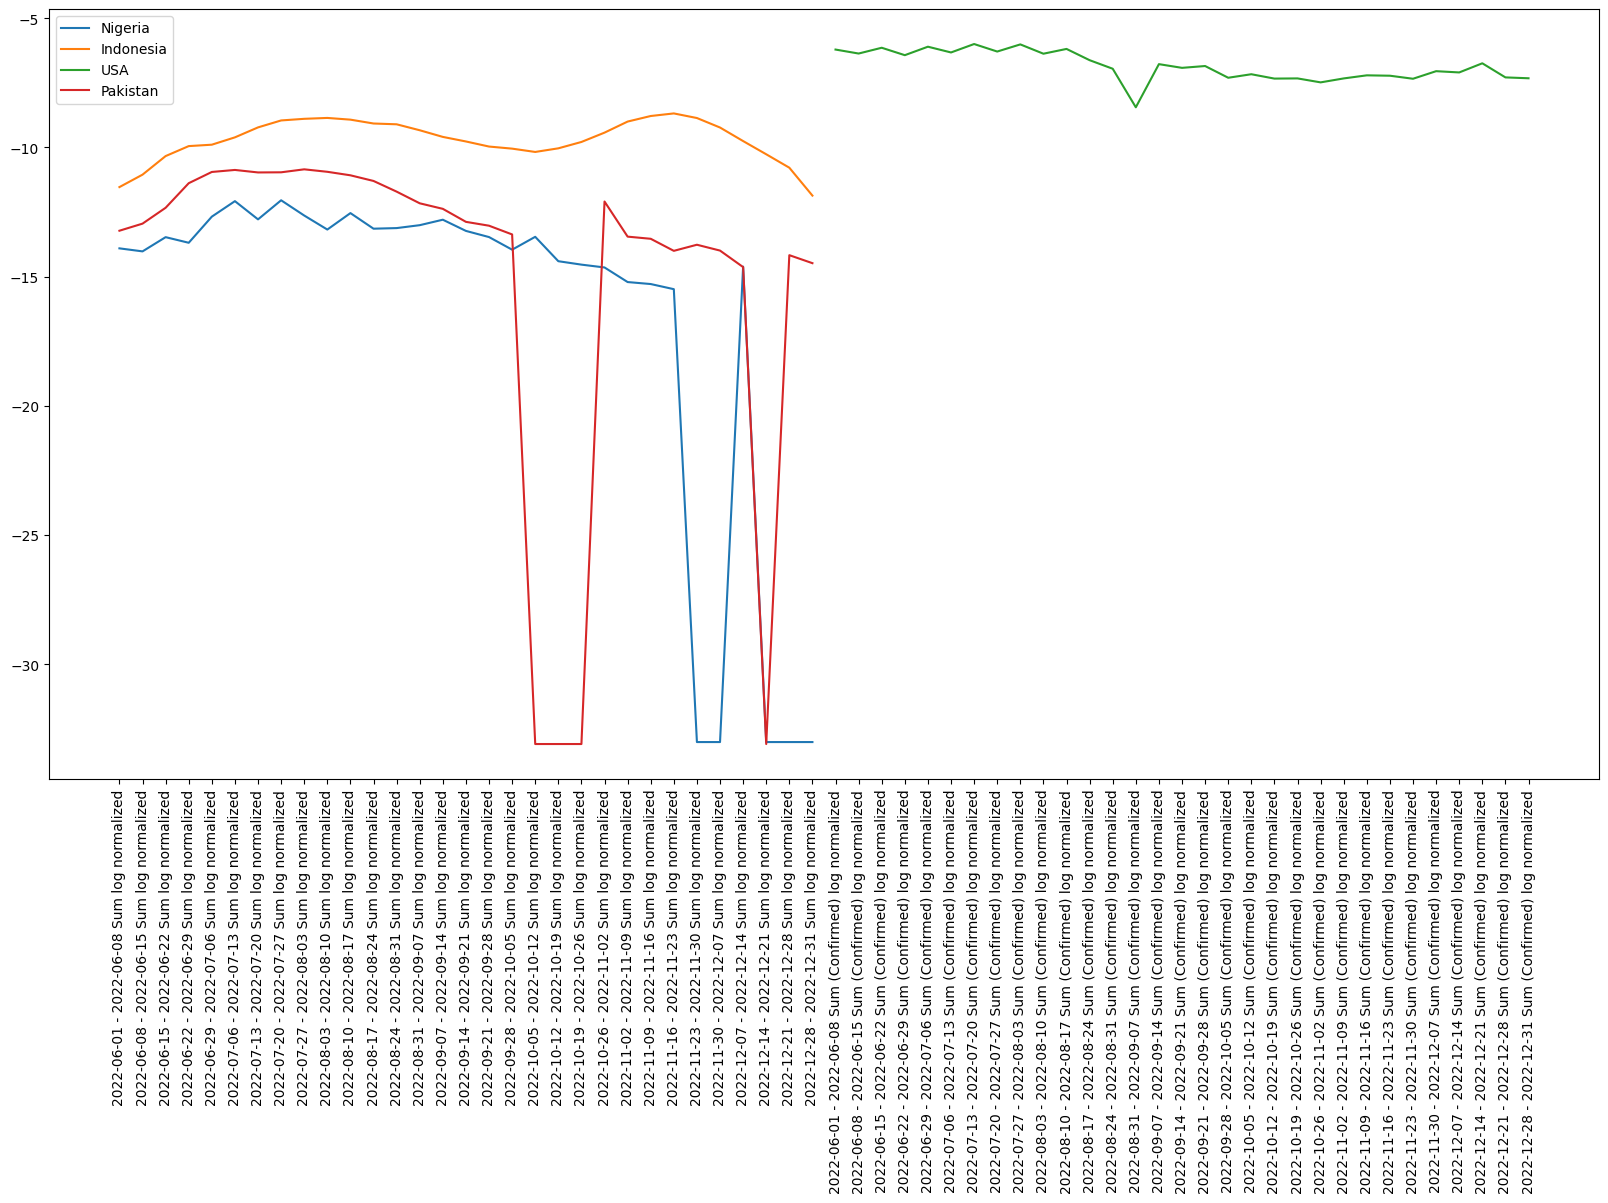

In [44]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))

plt.plot(nigeria_norm_cases.keys(), nigeria_norm_cases.values(), label = 'Nigeria')
plt.plot(indonesia_norm_cases.keys(), indonesia_norm_cases.values(), label = 'Indonesia')
plt.plot(usa_norm_cases.keys(), usa_norm_cases.values(), label = 'USA')
plt.plot(pakistan_norm_cases.keys(), pakistan_norm_cases.values(), label = 'Pakistan')
plt.xticks(rotation=90)

plt.legend()
plt.show()

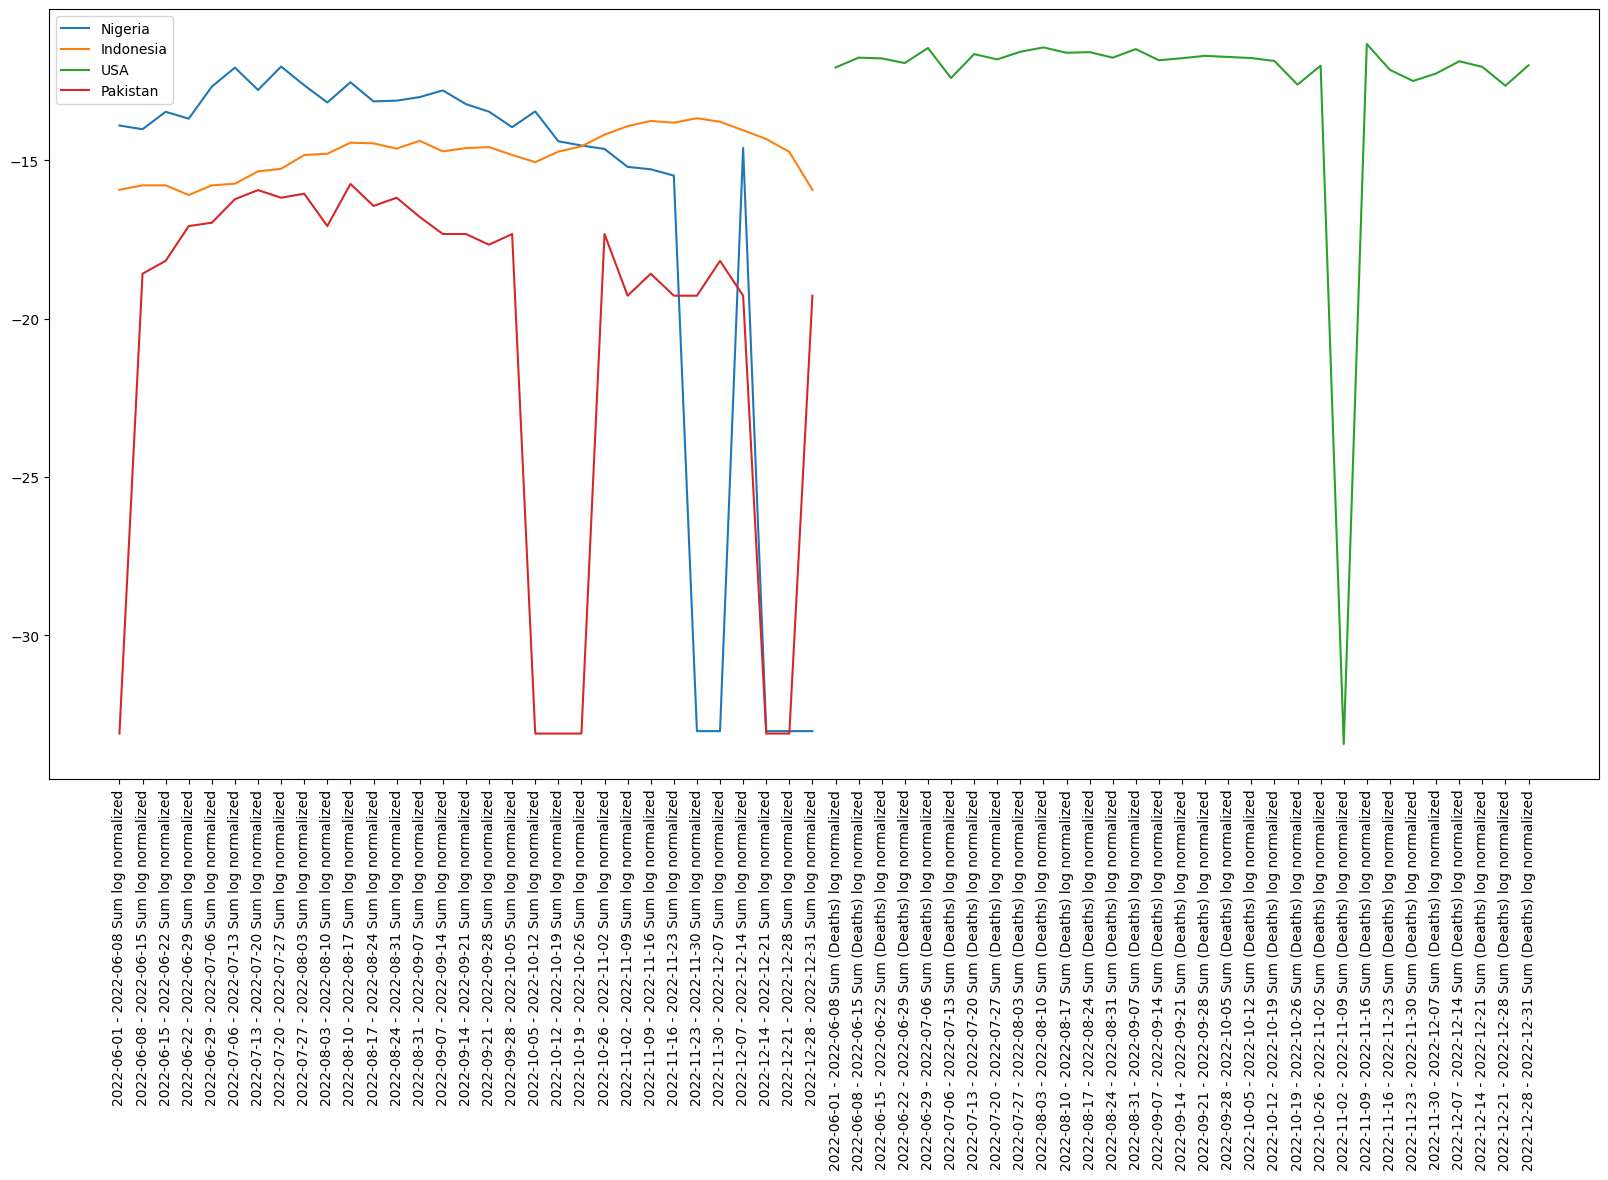

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(nigeria_norm_death.keys(), nigeria_norm_death.values(), label = 'Nigeria')
plt.plot(indonesia_norm_death.keys(), indonesia_norm_death.values(), label = 'Indonesia')
plt.plot(usa_norm_death.keys(), usa_norm_death.values(), label = 'USA')
plt.plot(pakistan_norm_death.keys(), pakistan_norm_death.values(), label = 'Pakistan')
plt.xticks(rotation=90)

plt.legend()
plt.show()

Looking over the data, we definitely see some differences between all of the countries in question. First, we can see that the United States has the overall highest number of cases and deaths versus the other countries, Nigeria, Indonesia and Pakistan. This data reflects that, save for a very jarring dip in deaths in the United States. We found that this dip is explained by poor data collection, in that we had a value that showed a negative number of deaths. When attempting to apply a logarithmic normalization, it causes an invalid entry that causes a break in the graph, so that value was set to zero to accommodate.

Along with that, there are also some jarring jumps from the Pakistani and Nigerian datasets, where we see some weeks there were zero reported cases or deaths. We also see that these remain consistent between cases and deaths. With some extra research, we can begin to make some assumptions about these jumps and why we see such a difference between weeks. 

In Pakistan, during the times of October 5th to October 26th, there were a series of floods that killed 1,739 people and caused $14.9 billion of damage and $15.2 billion of economic losses. It would not be unreasonable to think that tracking covid was not a priority in Pakistan, and could account for the losses to stability when during that month there likely couldn't be much reporting with attention split elsewhere. This carries over into the dip we see in December when, according to the UN Office for the Coordination of Humanitarian Affairs (OCHA), we see monsoon flooding in Pakistan; where an estimated 240,000 people remain displaced from their homes in Sindh Province. While this doesn't address why, country wide, there was a lapse in reporting, the rest may be due to poor practices with reporting cases and deaths, seeing as how both cases and deaths contain the lapse.

Similarly, looking toward Nigeria, we see a lapse in reporting in the last week of November as well as the final weeks of December. Something fairly consistent about the Nigeria is that the political climate tends to be volatile. There are many terrorist organizations operating in and around the country, so it's not unreasonable to think there could be attempts to quell numbers or just weeks of time that reporting was held back for some reason.

As for why America sees the highest numbers of covid 19 cases versus countries with similar populations, it's no secret that America has the highest population density out of any of these countries. Some of the biggest cities in America have millions of people and contribute to a higher spreading rate compared to other countries like Nigeria, Pakistan and Indonesia.

As always, with any country where we see major dips for seemingly no reason, there are some explanations that could tell us why we see such lapses. These reasons are multifaceted and multifactorial, as well as systematic within a system that may not be equipped to handle volumes of data at the scale we expect. Whether it be through technical issues, data management problems, political interference or lack of reports in testing, these issues still exist. It's important in that case for ongoing transparency between nations so we work together to make reporting as accurate and as specific as we need it to be for a healthy world climate.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8b9407f-9b55-4516-885c-d1bc9453ac0b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>